Importing Libraries

In [1]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

Importing data

In [3]:
train = pd.read_csv('/content/train_438.csv')
test = pd.read_csv('/content/test_438.csv')

In [4]:
print (train.shape, test.shape)

(2775, 13) (1196, 12)


EDA & Data-Preprocessing

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            2775 non-null   object 
 1   Gender             2707 non-null   object 
 2   Married            2770 non-null   object 
 3   Dependents         2705 non-null   object 
 4   Education          2775 non-null   object 
 5   Self_Employed      2644 non-null   object 
 6   ApplicantIncome    2775 non-null   int64  
 7   CoapplicantIncome  2775 non-null   float64
 8   LoanAmount         2681 non-null   float64
 9   Loan_Amount_Term   2738 non-null   float64
 10  Credit_History     2551 non-null   float64
 11  Property_Area      2775 non-null   object 
 12  Loan_Status        2775 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 282.0+ KB


Viewing no of null data in each feature of the train dataset

In [7]:
train.isnull().sum()

Loan_ID                0
Gender                68
Married                5
Dependents            70
Education              0
Self_Employed        131
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            94
Loan_Amount_Term      37
Credit_History       224
Property_Area          0
Loan_Status            0
dtype: int64

Viewing the test dataset

In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP007000,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP007001,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP007002,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP007003,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP007004,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1196 non-null   object 
 1   Gender             1173 non-null   object 
 2   Married            1196 non-null   object 
 3   Dependents         1166 non-null   object 
 4   Education          1196 non-null   object 
 5   Self_Employed      1116 non-null   object 
 6   ApplicantIncome    1196 non-null   int64  
 7   CoapplicantIncome  1196 non-null   int64  
 8   LoanAmount         1182 non-null   float64
 9   Loan_Amount_Term   1188 non-null   float64
 10  Credit_History     1095 non-null   float64
 11  Property_Area      1196 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 112.2+ KB


Viewing no of null data in each feature of the test dataset

In [10]:
test.isnull().sum()

Loan_ID                0
Gender                23
Married                0
Dependents            30
Education              0
Self_Employed         80
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            14
Loan_Amount_Term       8
Credit_History       101
Property_Area          0
dtype: int64

Counting frequency of categories for each categorical features

In [11]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      2161
Female     546
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    1778
No      992
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     1495
1      507
2      462
3+     241
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        2150
Not Graduate     625
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     2282
Yes     362
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    1010
Rural         904
Urban         861
Name: Property_Area, dtype: int64


Plotting No. of Males vs No. of Females

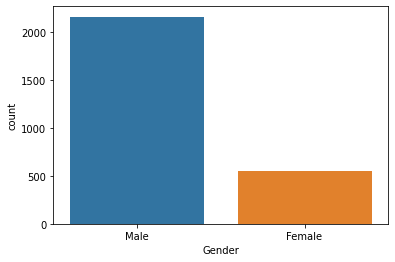

In [12]:
sns.countplot(train['Gender'])

Approval of loans between Males & Females

In [13]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,180,366,546
Male,628,1533,2161
All,808,1899,2707


The male are in large number as compared to female applicants.

Filling up NAN values of Gender and Converting categorial variables(Male,Female) to numerical variables(0,1)

In [14]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

Plotting No. of Dependants (Size of family) in each household

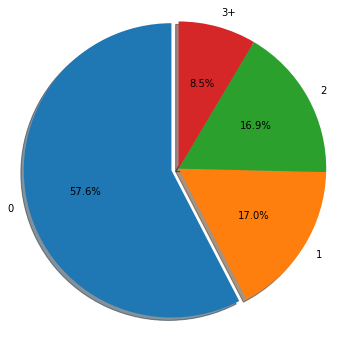

In [15]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [16]:
train.Dependents.value_counts()

0     1495
1      507
2      462
3+     241
Name: Dependents, dtype: int64

Approval of loans between different sizes of families

In [17]:
pd.crosstab(train.Dependents , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Dependents,,,
0,456,1039,1495
1,145,362,507
2,126,336,462
3+,77,164,241
All,804,1901,2705


The applicants with highest number of dependants are least in number whereas applicants with no dependance are greatest among these.

Filling up NAN values of Dependents and Converting categorial variables(1,2,3+) to numerical variables(1,2,3)

In [18]:
train.Dependents = train.Dependents.fillna("0")
test.Dependents = test.Dependents.fillna("0")

rpl = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

Plotting No. of people with vs without Credit History

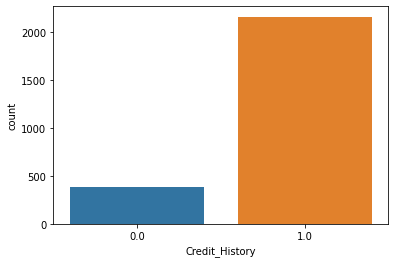

In [19]:
sns.countplot(train['Credit_History'])

Approval of loans people those who have Credit History and those who don't

In [20]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,353,35,388
1.0,435,1728,2163
All,788,1763,2551


Filling up NAN values of Credit history by taking the mode

In [21]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

Plotting No. of people who are Self-employed vs who aren't

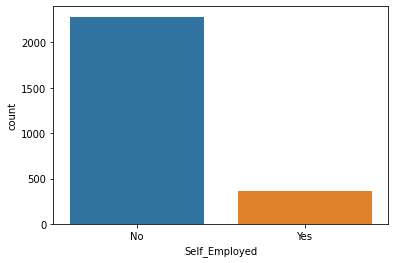

In [22]:
sns.countplot(train['Self_Employed'])

Approval of loans between people who are Self-employed & who aren't

In [23]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,690,1592,2282
Yes,118,244,362
All,808,1836,2644


Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [24]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

Plotting No. of Married people vs Unmarried people

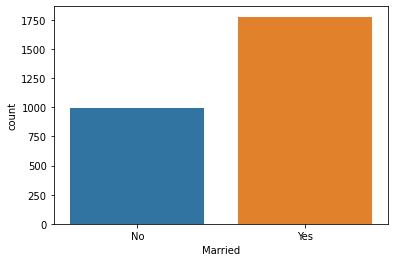

In [25]:
sns.countplot(train.Married)

Approval of loans between Married and Unmarried people

In [26]:
pd.crosstab(train.Married , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,358,634,992
Yes,478,1300,1778
All,836,1934,2770


Filling NAN values and Converting categorial variables(Yes,No) to numerical variables(1,0)

In [27]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

Filling up NAN values of Loan Amount Term

In [28]:
train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

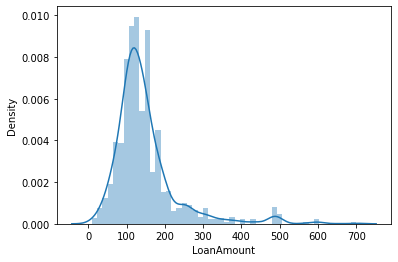

In [29]:
sns.distplot(train['LoanAmount'])

We observe no outliers in the continuous variable Loan Amount

Plotting Graduates vs Non-Graduates

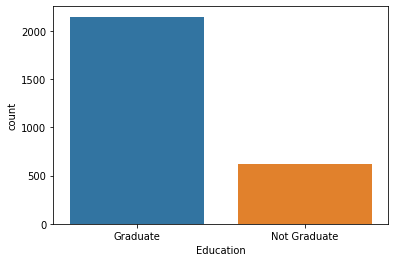

In [30]:
sns.countplot(train.Education)

Converting categorial variables to numerical variables

In [31]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

Property Area

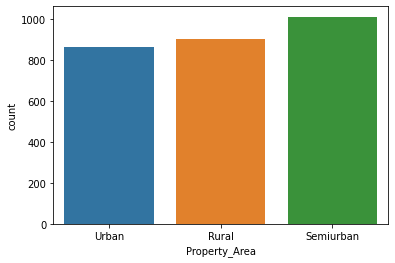

In [32]:
sns.countplot(train.Property_Area)

Converting categorial variables to numerical variables

In [33]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

Plotting Co-Applicant income and Applicant income

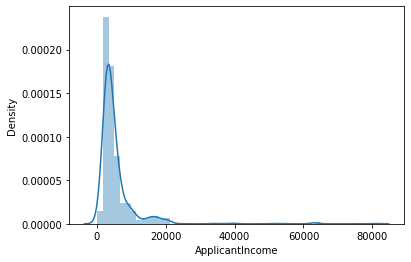

In [34]:
sns.distplot(train['ApplicantIncome'])

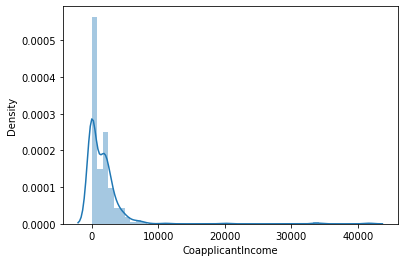

In [35]:
sns.distplot(train['CoapplicantIncome'])

Target Variable : Loan Status (Converting categorial variables to numerical variables)

In [36]:
train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

Dropping the ID column

In [37]:
train.drop(['Loan_ID'], axis = 1 , inplace =True)

Viewing the Datasets

In [38]:
train.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,employed_Yes,married_Yes
0,0,0,5849,0.0,148,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,0,1
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,0,1
4,0,0,6000,0.0,141,1.0,0,1,1,0,0


In [39]:
test.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,LP007000,0,0,5720,0,110,1.0,0,1,0,1
1,LP007001,1,0,3076,1500,126,1.0,0,1,0,1
2,LP007002,2,0,5000,1800,208,1.0,0,1,0,1
3,LP007003,2,0,2340,2546,100,1.0,0,1,0,1
4,LP007004,0,1,3276,0,78,1.0,0,1,0,0


Visualizing the Correlations and Relations

Plot between LoanAmount, Applicant Income, Employement and Gender
What is the relation of Loan taken between men and women?
Did the employed ones were greater in number to take Loan ?
What is distribution of Loan Amount and Income?

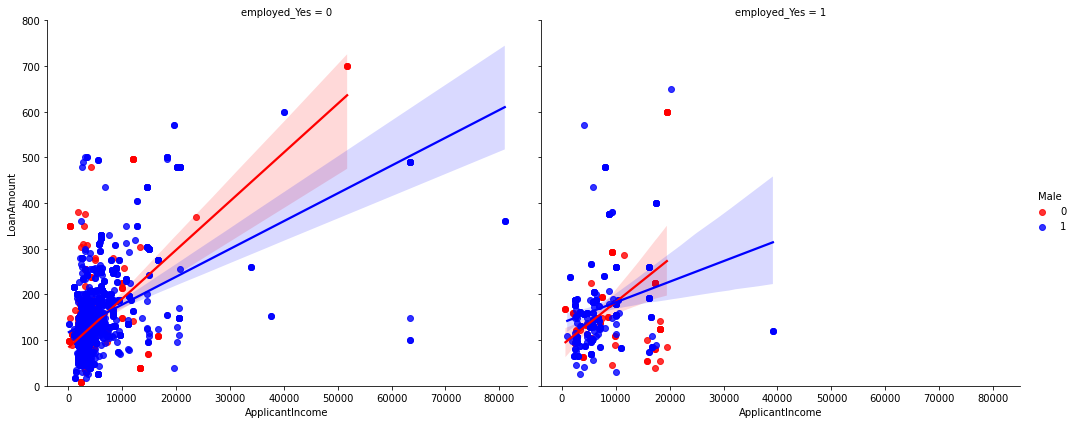

In [40]:
g = sns.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))
##Relation Between the Male or female Applicant's income , Loan taken and Self employment.

Above graph tells:
- The male applicants take more amount of loan than female.
- The males are higher in number of "NOT self employed" category.
- The amount is still larger in the income range in (0 to 20000).
- Also we observe that majority of applicants are NOT self employed.
- Highest Loan amount taken is by the female applicant of about 700 which is NOT self employed.
- The majority of income taken is about 0-200 with income in the range 0-20000. 
- The line plotted shows that with increase in income the amount of loan increases with almost same slope for the case of women in both the cases but a slightely lesser slope in the case of men in Self- Employed category as compared to non-self employed.

Boxplots for relation between Property Area, Amount of Loan and Education qualification
Property_Area:
Urban      :0
Semiurban  :1
Rural      :2

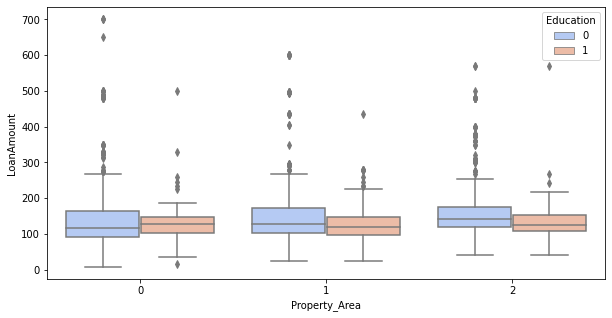

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train, palette="coolwarm")

The above boxplot signifies that,
- In the Urban area the non graduates take slightly more loan than graduates. 
- In the Rural and semiurban area the graduates take more amount of Loan than non graduates 
- The higher values of Loan are mostly from Urban area 
- The semiurban area and rural area both have one unusual Loan amount close to zero.


Relation between Credit History and Loan status.

In [42]:
train.Credit_History.value_counts()

1.0    2387
0.0     388
Name: Credit_History, dtype: int64

In [43]:
print(train.Credit_History)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2770    1.0
2771    1.0
2772    1.0
2773    0.0
2774    1.0
Name: Credit_History, Length: 2775, dtype: float64


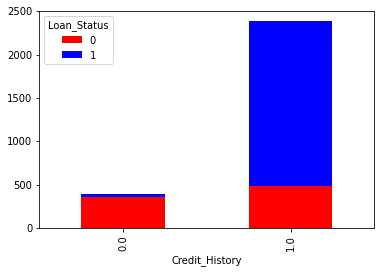

In [44]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

The credit history vs Loan Status indicates:
The good credit history applicants have more chances of getting Loan.
With better credit History the Loan amount given was greater too.
But many were not given loan in the range 0-100
The applicant with poor credit history were handled in the range 0-100 only

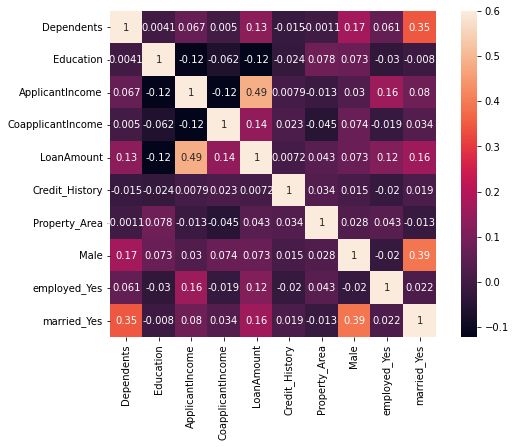

In [45]:
plt.figure(figsize=(9,6))
sns.heatmap(train.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True)

Modelling

The problem is of Classification as observed and concluded from the data and visualisations

In [46]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

78.75150060024009

Random Forest

In [48]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

93.39735894357743

K-Nearest Neighbors

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

86.43457382953181

Naive Bayes

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

76.83073229291718

SVM

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

69.74789915966386

Gradient Boosting Classifier

In [52]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

85.59423769507804

In [53]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forrest,93.397359
2,K- Nearest Neighbour,86.434574
5,Gradient Boosting Classifier,85.594238
0,Logistic Regression,78.751501
3,Naive Bayes,76.830732
4,SVM,69.747899


The highest classification accuracy is shown by Logistic Regression => 83.78%


Let us Check the feature importance

In [54]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11)

,Importance
Features,
Credit_History,0.301
LoanAmount,0.204
ApplicantIncome,0.203
CoapplicantIncome,0.122
Property_Area,0.050
Dependents,0.044
Education,0.020
married_Yes,0.020
Male,0.017


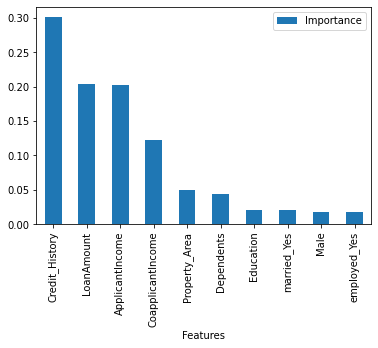

In [55]:
importances.plot.bar()